### 회귀 - 당뇨병

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2023

np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [36]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=seed
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

- 모델 정의/설정/학습/평가

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential([
    Dense(24, input_dim=10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)                            # 회귀모델이므로 activation='linear' 생략 
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                264       
                                                                 
 dense_10 (Dense)            (None, 10)                250       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 525 (2.05 KB)
Trainable params: 525 (2.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# 회귀 실행시에는 metrics 사용하지 않음
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [41]:
hist = model.fit(x_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=2)

Epoch 1/100


3/3 - 1s - loss: 28741.4180 - val_loss: 30233.4297 - 650ms/epoch - 217ms/step
Epoch 2/100
3/3 - 0s - loss: 28729.6172 - val_loss: 30223.8555 - 31ms/epoch - 10ms/step
Epoch 3/100
3/3 - 0s - loss: 28720.5098 - val_loss: 30215.0352 - 33ms/epoch - 11ms/step
Epoch 4/100
3/3 - 0s - loss: 28712.2578 - val_loss: 30206.6406 - 32ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 28704.2695 - val_loss: 30198.2891 - 32ms/epoch - 11ms/step
Epoch 6/100
3/3 - 0s - loss: 28696.3418 - val_loss: 30189.8848 - 31ms/epoch - 10ms/step
Epoch 7/100
3/3 - 0s - loss: 28688.3750 - val_loss: 30181.3594 - 34ms/epoch - 11ms/step
Epoch 8/100
3/3 - 0s - loss: 28680.2363 - val_loss: 30172.5605 - 34ms/epoch - 11ms/step
Epoch 9/100
3/3 - 0s - loss: 28671.8789 - val_loss: 30163.5254 - 32ms/epoch - 11ms/step
Epoch 10/100
3/3 - 0s - loss: 28663.2793 - val_loss: 30154.1797 - 32ms/epoch - 11ms/step
Epoch 11/100
3/3 - 0s - loss: 28654.3730 - val_loss: 30144.5566 - 32ms/epoch - 11ms/step
Epoch 12/100
3/3 - 0s - loss: 28645.1914

In [42]:
# 평가
pred = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred.flatten())
r2

-2.736718114709162

In [44]:
import pandas as pd
df = pd.DataFrame({'pred':pred.flatten(), 'y_test':y_test})
df.head()

,pred,y_test
0,10.710149,265.0
1,12.409788,261.0
2,9.615556,160.0
3,12.777245,249.0
4,9.625099,102.0


- 학습과정 시각화

In [46]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss) + 1)


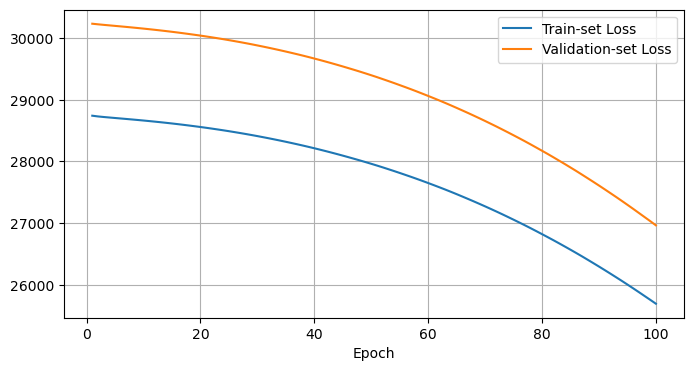

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(xs, y_loss, label='Train-set Loss')
plt.plot(xs, y_vloss, label='Validation-set Loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()